In [2]:
import torch
import torchvision
import torch.nn as nn
from PIL import Image
import torchvision.transforms as transforms
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [55]:
# Load and preprocess your image
def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    plt.imshow(image)
    preprocess = transforms.Compose([
        transforms.Resize((25, 25)),
        transforms.ToTensor(),
    ])
    image = preprocess(image)
    return image.unsqueeze(0)  # Add batch dimension

In [43]:
# Define your FeatureExtractor class
class FeatureExtractor(nn.Module):
    def __init__(self):
        super().__init__()
        self.backbone = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=3, stride=2)
        for param in self.backbone.parameters():
            param.requires_grad = True

    def forward(self, img_data):
        return self.backbone(img_data)

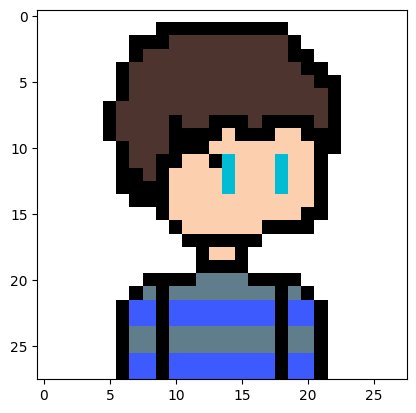

In [82]:
# Load your image
image_path = '../random/random11.png'

img_data = preprocess_image(image_path)

# Create an instance of the FeatureExtractor
model = FeatureExtractor()

# Call the forward method passing the input data
output = model(img_data)